In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from collections import Counter


In [2]:
train = pd.read_csv('new-york-city-taxi-fare-prediction/train.csv', nrows = 5_000_000, 
                   parse_dates = ['pickup_datetime']).drop(columns = 'key')

In [3]:
print(train.shape)
print(train.columns)
print(train.dtypes)

(5000000, 7)
Index(['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count'],
      dtype='object')
fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object


In [4]:
train.head(4)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1


In [6]:
#check null values
print("before removing null values",train.isnull().sum().sort_values(ascending=False))
train = train.drop(train[train.isnull().any(1)].index, axis = 0)
print("after removing null values",train.isnull().sum().sort_values(ascending=False))

before removing null values dropoff_latitude     36
dropoff_longitude    36
passenger_count       0
pickup_latitude       0
pickup_longitude      0
pickup_datetime       0
fare_amount           0
dtype: int64
after removing null values passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
dtype: int64


In [7]:
print(train.shape)


(4999964, 7)


C:\Users\v-ashkha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution Fare')

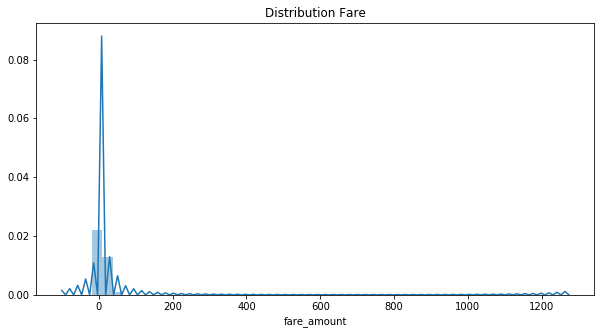

In [8]:
plt.figure(figsize=(10,5))
sns.distplot(train['fare_amount'])
plt.title('Distribution Fare')

# Outliers #pariahs


count    4.999964e+06
mean     1.134074e+01
std      9.820066e+00
min     -1.000000e+02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare_amount, dtype: float64

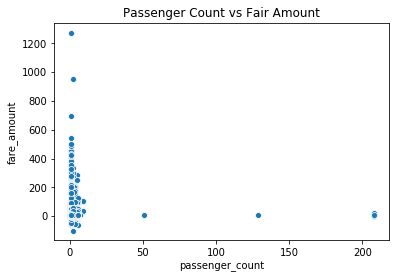

In [9]:
sns.scatterplot(train['passenger_count'],train['fare_amount'])
plt.title('Passenger Count vs Fair Amount')
train['fare_amount'].describe()


In [12]:
#-ve values in fair amount shall be removed 
print(Counter(train['fare_amount']<0))
train = train.drop(train[train['fare_amount']<0].index, axis=0)
print(train.shape)


Counter({False: 4999753})
(4999753, 7)


In [24]:
train['fare_amount'].describe()

count    4.999753e+06
mean     1.134159e+01
std      9.819001e+00
min      0.000000e+00
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      1.273310e+03
Name: fare_amount, dtype: float64

In [29]:
print("passenger stats \n",train['passenger_count'].describe())
train[train['passenger_count']>51]


passenger stats 
 count    4.999753e+06
mean     1.684702e+00
std      1.331848e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.080000e+02
Name: passenger_count, dtype: float64


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
929022,3.3,2009-07-30 11:54:00,0.000000,0.000000,0.000000,0.000000,208
2154045,3.3,2010-12-16 11:21:00,0.000000,0.000000,0.000000,0.000000,208
2198549,3.3,2010-12-15 14:20:00,0.000000,0.000000,0.000000,0.000000,208
2910347,4.5,2010-12-16 06:44:00,0.000000,0.000000,0.000000,0.000000,208
3107489,2.7,2009-05-12 14:50:00,-73.937818,40.758260,-73.937827,40.758250,208
3323791,8.5,2011-08-27 01:24:00,-73.987858,40.760340,-74.000682,40.752413,129
4103745,23.7,2010-12-22 12:11:00,0.000000,0.000000,0.000000,0.000000,208
4432483,11.1,2009-05-11 13:56:00,-73.937733,40.758267,-73.937737,40.758273,208


In [30]:
train = train.drop(train[train['passenger_count']==208].index, axis = 0)

In [31]:
train['passenger_count'].describe()

count    4.999746e+06
mean     1.684413e+00
std      1.309285e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.290000e+02
Name: passenger_count, dtype: float64

In [32]:
train['pickup_latitude'].describe()

count    4.999746e+06
mean     3.991991e+01
std      8.963290e+00
min     -3.488080e+03
25%      4.073491e+01
50%      4.075263e+01
75%      4.076712e+01
max      3.310364e+03
Name: pickup_latitude, dtype: float64

In [33]:
print(train[train['pickup_latitude']<-90])
print(train[train['pickup_latitude']>90])


         fare_amount     pickup_datetime  pickup_longitude  pickup_latitude  \
150559          25.3 2012-08-03 07:43:00          0.000000     -3116.285383   
436233           4.1 2012-03-11 01:56:00      -2986.242495      -880.627428   
543001           5.3 2011-10-28 13:53:00      -3377.680935      -113.019497   
1281413         11.3 2011-09-02 22:51:00      -2256.421232     -1185.391185   
1340837         10.1 2011-06-09 10:39:00       2434.238557     -3458.664702   
1388984         11.3 2012-01-18 21:33:00      -1649.643088      -849.829532   
1606685          4.9 2011-07-05 17:10:00      -1329.480383      -764.564600   
1781778          6.5 2011-10-13 07:10:00      -1659.514697      -821.904472   
2035826          6.1 2012-01-11 23:48:00      -3313.387292      -812.119530   
2037003          7.3 2011-05-22 17:08:00      -2995.982437     -2847.702303   
2612104          4.5 2011-09-10 09:35:00        408.352392     -3488.079513   
2862434          6.5 2011-06-18 02:46:00        976.

In [34]:
#drop it like its hot
train = train.drop(((train[train['pickup_latitude']<-90])|(train[train['pickup_latitude']>90])).index, axis=0)
train.shape


(4999662, 7)

In [35]:
train['pickup_longitude'].describe()


count    4.999662e+06
mean    -7.250481e+01
std      1.104701e+01
min     -2.970874e+03
25%     -7.399206e+01
50%     -7.398181e+01
75%     -7.396711e+01
max      2.814476e+03
Name: pickup_longitude, dtype: float64

In [36]:
train[train['pickup_longitude']<-180]
train[train['pickup_longitude']>180]
## drop it like its hot
train = train.drop(((train[train['pickup_longitude']<-180])|(train[train['pickup_longitude']>180])).index, axis=0)
train.shape

(4999610, 7)

In [37]:
train = train.drop(((train[train['dropoff_latitude']<-90])|(train[train['dropoff_latitude']>90])).index, axis=0)
train[train['dropoff_latitude']<-180]|train[train['dropoff_latitude']>180]


,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [40]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
dtype: object

In [41]:
train['year'] = pd.DatetimeIndex(train['pickup_datetime']).year
train['month'] = pd.DatetimeIndex(train['pickup_datetime']).month
train['WeekDay'] = pd.DatetimeIndex(train['pickup_datetime']).dayofweek
train['hour'] = pd.DatetimeIndex(train['pickup_datetime']).hour

In [63]:
train.groupby(['WeekDay','year']).size()

WeekDay  year
0        2009     96909
         2010     95605
         2011    103410
         2012    104193
         2013    101581
         2014     95225
         2015     44215
1        2009    109863
         2010    105325
         2011    113919
         2012    110799
         2013    110517
         2014    102688
         2015     47154
2        2009    112090
         2010    110166
         2011    116535
         2012    115248
         2013    112046
         2014    109295
         2015     48329
3        2009    118890
         2010    113335
         2011    120455
         2012    120328
         2013    115337
         2014    108750
         2015     51853
4        2009    121223
         2010    117279
         2011    122948
         2012    123956
         2013    119341
         2014    112045
         2015     54357
5        2009    113971
         2010    112630
         2011    120839
         2012    122777
         2013    118312
         2014    114433
  

Text(0,0.5,'Count')

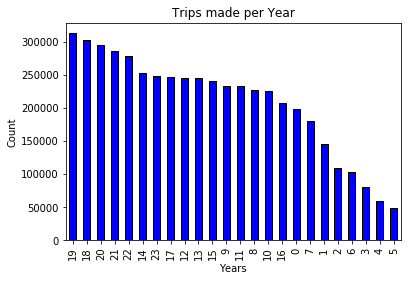

In [43]:
train['hour'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Trips made per Year'); plt.xlabel('Years'); plt.ylabel('Count')

C:\Users\v-ashkha\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


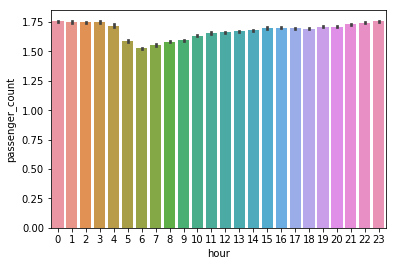

In [44]:
sns.barplot(train['hour'],train['passenger_count'])

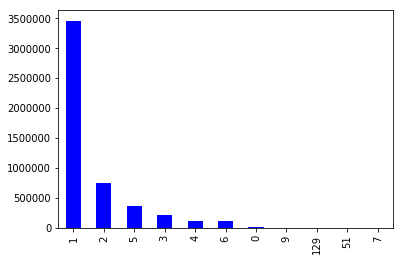

In [46]:
train['passenger_count'].value_counts().plot.bar(color = 'b');

In [47]:
# Absolute difference in latitude and longitude
train['abs_lat_diff'] = (train['dropoff_latitude'] - train['pickup_latitude']).abs()
train['abs_lon_diff'] = (train['dropoff_longitude'] - train['pickup_longitude']).abs()


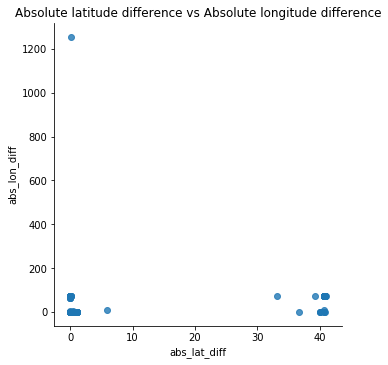

In [48]:
sns.lmplot('abs_lat_diff', 'abs_lon_diff', fit_reg = False,
           data = train.sample(100000, random_state=1010));
plt.title('Absolute latitude difference vs Absolute longitude difference');

In [49]:
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 
                                       - y1)) ** p) ** (1 / p)

In [50]:
train['manhattan'] = minkowski_distance(train['pickup_longitude'], train['dropoff_longitude'],
                                       train['pickup_latitude'], train['dropoff_latitude'], 1)

train['euclidean'] = minkowski_distance(train['pickup_longitude'], train['dropoff_longitude'],
                                       train['pickup_latitude'], train['dropoff_latitude'], 2)




In [51]:
train.groupby(['year','passenger_count'])['fare_amount'].agg(['mean', 'count'])

mean   count
year passenger_count                    
2009 0                  6.875000       4
     1                  9.924500  523591
     2                 10.477019  124538
     3                 10.220603   35352
     4                 10.441686   17152
     5                 10.067483   67096
     6                  9.893163    3304
2010 0                  8.222013     159
     1                 10.021829  516468
     2                 10.566442  118896
     3                 10.340348   34241
     4                 10.524500   16689
     5                 10.231759   63878
     6                  9.754120    3092
     51                 9.300000       1
2011 0                  9.010122   11519
     1                 10.336806  540986
     2                 10.883534  122644
     3                 10.633792   36098
     4                 10.906356   17235
     5                 10.482053   62395
     6                 10.608771    7016
     129                8.500000       1
2012 0                  8.867780    5720
     1                 11.052421  558460
     2                 11.745267  112792
     3                 11.423044   34652
     4                 11.650622   16723
     5                 11.153250   54760
     6                 11.480210   21963
2013 0                 24.433333       3
     1                 12.433648  549971
     2                 13.284985  105950
     3                 12.975697   32761
     4                 13.185060   16228
     5                 12.691748   45043
     6                 12.453668   30311
2014 0                 20.155806      31
     1                 12.718825  523042
     2                 13.681061  104288
     3                 13.243039   31525
     4                 13.547274   15247
     5                 13.161790   41527
     6                 12.878314   27705
     9                104.000000       1
2015 0                 10.774578     166
     1                 12.821488  246243
     2                 13.733324   49197
     3                 13.517663   14624
     4                 13.556121    6733
     5                 12.958268   19181
     6                 12.975155   12373
     7                  8.500000       1
     9                 37.040000       1

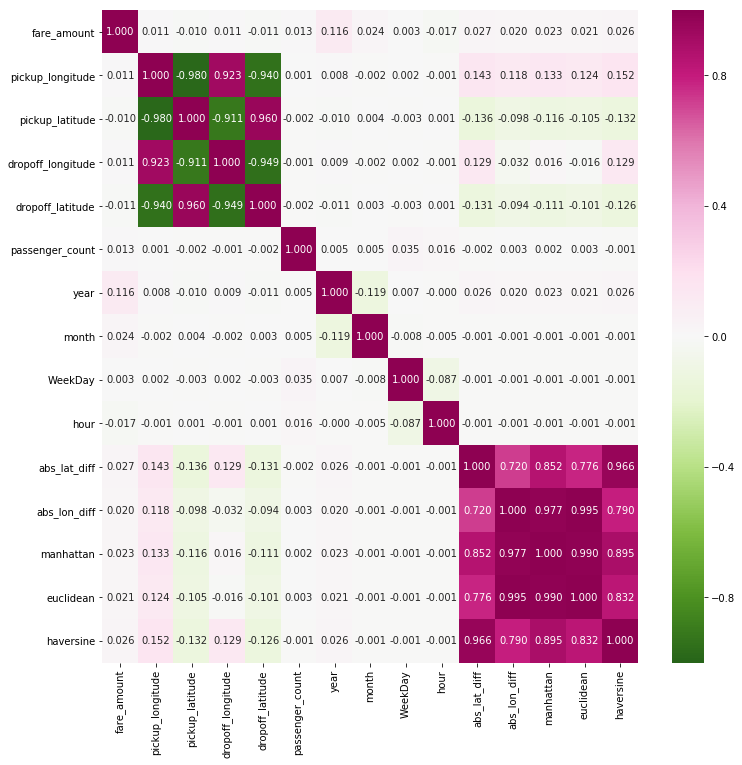

In [93]:
corrs = train.corr()

plt.figure(figsize = (12, 12))
sns.heatmap(corrs, annot = True, vmin = -1, vmax = 1, fmt = '.3f', cmap=plt.cm.PiYG_r);


(4999577, 15)


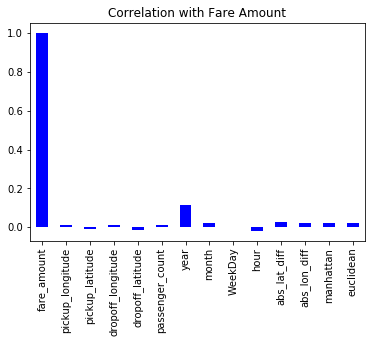

In [56]:
corrs = train.corr()
corrs['fare_amount'].plot.bar(color = 'b');
plt.title('Correlation with Fare Amount');
print(train.shape)

In [54]:
#Test data

test = pd.read_csv('new-york-city-taxi-fare-prediction/test.csv', parse_dates = ['pickup_datetime'])

# Create absolute differences
test['abs_lat_diff'] = (test['dropoff_latitude'] - test['pickup_latitude']).abs()
test['abs_lon_diff'] = (test['dropoff_longitude'] - test['pickup_longitude']).abs()

test['year'] = pd.DatetimeIndex(test['pickup_datetime']).year
test['month'] = pd.DatetimeIndex(test['pickup_datetime']).month
test['WeekDay'] = pd.DatetimeIndex(test['pickup_datetime']).dayofweek
test['hour'] = pd.DatetimeIndex(test['pickup_datetime']).hour
print(test.columns)

Index(['key', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count',
       'abs_lat_diff', 'abs_lon_diff', 'year', 'month', 'WeekDay', 'hour'],
      dtype='object')


In [55]:
print(test.shape)
test.head(5)

(9914, 13)


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_lat_diff,abs_lon_diff,year,month,WeekDay,hour
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,0.019970,0.008110,2015,1,1,13
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,0.019817,0.012024,2015,1,1,13
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,0.005121,0.002870,2011,10,5,11
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,0.016172,0.009288,2012,12,5,21
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,0.045348,0.022519,2012,12,5,21


In [57]:
test['manhattan'] = minkowski_distance(test['pickup_longitude'], test['dropoff_longitude'],
                                       test['pickup_latitude'], test['dropoff_latitude'], 1)

test['euclidean'] = minkowski_distance(test['pickup_longitude'], test['dropoff_longitude'],
                                       test['pickup_latitude'], test['dropoff_latitude'], 2)

# Calculate Distance between points using Haversine distance
To calculate a more realistic distance between the pickup and dropoff, we can use the Haversine distance. This is the Great Circle distance, representing the shortest distance along the surface of the Earth connecting two points taking into account the fact that the Earth is a sphere (or so I'm told). It's not the best measure because the taxis do not travel along lines, but it's more accurate in terms of an absolute distance than the Manhattan and Euclidean distances made from the absolute latitude and longitude difference. The Manhattan and Euclidean distances are relative and do not take into account the spherical shape of the Earth.

(We could convert the latitude and longitude into cartesian coordinates after establishing an origin. One option would be to use the center of the Earth and another would be to use the average of all coordinates in the data as an origin. Then, once we converted the points in this coordinate system, we could use the Manhattan and Euclidean formulas to find distances between points in kilometers. These are all approximations because we can't find the actual street distance.)

The formula for Haversine distance is:

=2rarcsin(sin2(φ2−φ12)+cos(φ1)cos(φ2)sin2(λ2−λ12)−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−−√)
 
where r is the radius of the Earth. The end units will be in km. My thanks go to this Stack Overflow answer: https://stackoverflow.com/a/29546836

also from source code: https://www.kaggle.com/willkoehrsen/a-walkthrough-and-a-challenge#Data-Exploration-and-Data-Cleaning

In [58]:
# Radius of the earth in kilometers
R = 6378

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    
    
    source: https://stackoverflow.com/a/29546836

    """
    # Convert latitude and longitude to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Find the differences
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Apply the formula 
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    # Calculate the angle (in radians)
    c = 2 * np.arcsin(np.sqrt(a))
    # Convert to kilometers
    km = R * c
    
    return km

In [59]:
train['haversine'] =  haversine_np(train['pickup_longitude'], train['pickup_latitude'],
                         train['dropoff_longitude'], train['dropoff_latitude']) 

test['haversine'] = haversine_np(test['pickup_longitude'], test['pickup_latitude'],
                         test['dropoff_longitude'], test['dropoff_latitude'])

ML algo

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression()

X_train, X_valid, y_train, y_valid = train_test_split(train, np.array(train['fare_amount']), 
                                                      random_state = 99, test_size = 1_000_000)


In [89]:
#lr.fit(X_train[['year','month','passenger_count','WeekDay']], y_train)
lr.fit(X_train[['haversine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count','hour','year','manhattan','euclidean']], y_train)

print('Intercept', round(lr.intercept_, 4))
print('abs_lat_diff coef: ', round(lr.coef_[0], 4), 
      '\tabs_lon_diff coef:', round(lr.coef_[1], 4))
#'\tpassenger_count coef:', round(lr.coef_[2], 4))

 
train_pred = lr.predict(X_train[['haversine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count','hour','year','manhattan','euclidean']])
valid_pred = lr.predict(X_valid[['haversine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count','hour','year','manhattan','euclidean']])


Intercept -1208.9921
abs_lat_diff coef:  0.0002 	abs_lon_diff coef: 0.0842


In [90]:
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

valid_rmse = np.sqrt(mean_squared_error(y_valid, valid_pred))

print(f'Training:   rmse = {round(train_rmse, 2)}')
print(f'Validation: rmse = {round(valid_rmse, 2)}')
#X_train = X_train.dropna(inplace=True)

Training:   rmse = 9.76
Validation: rmse = 9.7


In [73]:
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)


print('Intercept', round(lr.intercept_, 4))
print('abs_lat_diff coef: ', round(lr.coef_[0], 4), 
      '\tabs_lon_diff coef:', round(lr.coef_[1], 4),     '\tpassenger_count coef:', round(lr.coef_[2], 4))
X_train.dtypes

Intercept 11.1631
abs_lat_diff coef:  0.0001 	abs_lon_diff coef: 0.1362 	passenger_count coef: -0.0017


fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
month                         int64
WeekDay                       int64
hour                          int64
abs_lat_diff                float64
abs_lon_diff                float64
manhattan                   float64
euclidean                   float64
haversine                   float64
dtype: object

In [91]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest
random_forest = RandomForestRegressor(n_estimators = 20, max_depth = 20, 
                                      max_features = None, oob_score = True, 
                                      bootstrap = True, verbose = 1, n_jobs = 10)

random_forest.fit(X_train[['haversine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count','hour']], y_train)


train_pred = random_forest.predict(X_train[['haversine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count','hour']])
valid_pred = random_forest.predict(X_valid[['haversine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count','hour']])



[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  20 out of  20 | elapsed:  5.9min finished
C:\Users\v-ashkha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  20 out of  20 | elapsed:   16.0s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  20 out of  20 | elapsed:    4.3s finished


In [92]:
train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))

valid_rmse = np.sqrt(mean_squared_error(y_valid, valid_pred))

print(f'Training:   rmse = {round(train_rmse, 2)}')
print(f'Validation: rmse = {round(valid_rmse, 2)}')
print("Important feaures ",random_forest.feature_importances_)

Training:   rmse = 4.09
Validation: rmse = 4.92
Important feaures  [0.88397401 0.03204502 0.06069479 0.00516357 0.0181226 ]


In [79]:
import lightgbm as lgbm
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': -1,
        'verbose': 0,
        'num_leaves': 31,
        'learning_rate': 0.05,
        'max_depth': -1,
        'subsample': 0.8,
        'subsample_freq': 1,
        'colsample_bytree': 0.6,
        'reg_aplha': 1,
        'reg_lambda': 0.001,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1     
    }

ModuleNotFoundError: No module named 'lightgbm'